https://www.youtube.com/watch?v=m62I5_ow3O8

https://youtu.be/pneluWj-U-o

# Fisher information $I(\theta)$: 1D Case
*   Random variable $X$ is outcome of some stochastic process
*   Likelihood function $L(X;\theta)$ shows 'how likely' random variables $x \in X$ may have come from a model with parameter $\theta$. 
    _It has a different logic that a probability function $P(X;\theta)$._
*   _Score_ is a derivative (gradient) of a log-likelihood function with respect to model's parameters: 
    $$s(X;\theta) = \frac{\partial}{\partial \theta} \log L(X;\theta)$$

    It shows the 'sensitivity' of likelihood function to change of parameter $\theta$. Taking a log may be viewed as a way to boost (exaggerate) small values.
    
*   Fisher information is an expectation of score-squared. 
    $$ I(\theta) = \mathbb{E}\bigg[ s(X;\theta)^2 \bigg| \theta \bigg] = \mathbb{E}\bigg[ \bigg(\frac{\partial}{\partial \theta} \log L(X;\theta)\bigg)^2 \bigg| \theta\bigg] $$

_NOTE: i yet dont know how to explain this intuitively. Lets look at examples._

***
## Example 1D
Example from https://youtu.be/82molmnRCg0

Suppose that we are measuring a signal $Y$ and assume a _model_ in with gaussian noise $W \sim \N (0, \sigma^2)$ is present.
$$Y = \theta + W$$
Although true value $\theta$ is constant, due to randomness of noise our signal is also random variable.

We want to know, based on our assumptions on how we model our noise $(\sigma)$, how 'confident' can we be about measuring true signal $\theta$. And we can do it using Fisher Information.

$$ I(\theta) = \mathbb{E}\bigg[ s(X;\theta)^2 \bigg| \theta \bigg] = \int_{-\infty}^\infty s(x;\theta)^2 L(x;\theta) dx$$

In [71]:
from sympy import log, diff, symbols, integrate, oo
from sympy.stats import Normal, density

x, theta, sigma, pi = symbols('x, theta, sigma, pi', real=True)
distr = Normal(x,theta, sigma)
L = density(distr)(x)
print('density function:')
display(L)

logL = log(L).simplify()
print('log density function:')
display(logL)
print('log density function (expanded):')
display(logL.expand(force=True))
print('score function (taking a derivative):')
dldt = logL.diff(theta).simplify()
display(dldt)
print('Compute expectation (integral)')
FI = integrate(dldt**2 * L, (x,-oo, oo))
display(FI)
print('Fisher information as a function of model parameter is')
FI.args[0][0]

density function:


sqrt(2)*exp(-(-theta + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

log density function:


log(exp(-(theta - x)**2/(2*sigma**2))/sigma) - log(pi)/2 - log(2)/2

log density function (expanded):


-log(sigma) - log(pi)/2 - log(2)/2 - theta**2/(2*sigma**2) + theta*x/sigma**2 - x**2/(2*sigma**2)

score function (taking a derivative):


(-theta + x)/sigma**2

Compute expectation (integral)


Piecewise((sigma**(-2), Abs(arg(sigma)) < pi/4), (Integral(sqrt(2)*(-theta + x)**2*exp(-(-theta + x)**2/(2*sigma**2))/(2*sqrt(pi)*sigma**5), (x, -oo, oo)), True))

Fisher information as a function of model parameter is


sigma**(-2)

We see that Fisher information for this example is inversely proportional to variance. 
*   More noise- $\sigma$ is big, 1/big = small, the less information about true $\theta$ we can extract
*   Less noise- $\sigma$ is small, 1/small = big, the more information about true $\theta$ we can extract
***

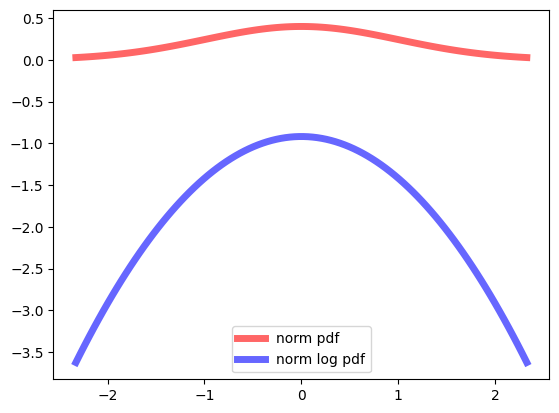

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, norm.logpdf(x),'b-', lw=5, alpha=0.6, label='norm log pdf')
ax.legend()

# Fisher information in terms of expectation over 2nd derivative
Goal:
$$\mathbb{E}[ (\partial_x L(x))^2 ] \longleftrightarrow \mathbb{E}[ \partial_{xx} L(x) ]$$

We know that by chain rule
$$ s(x) = \frac{\partial \ \log \ f(x)}{\partial x}  \longleftrightarrow (log \ f(x))'= \frac{f(x)'}{f(x)} $$
and 
$$(log \ f(x))'' = \bigg(\frac{f(x)'}{f(x)} \bigg)' = \frac{f(x) \cdot f(x)'' - (f(x)')^2}{f(x)^2} = \frac{f(x)''}{f(x)} - \bigg(\frac{f(x)'}{f(x)}\bigg)^2$$
last term is $s(x)^2$.

In [15]:
from sympy import Symbol, Function, diff, log
t = Symbol('t');f = Function('f');a1 = diff(log(f(t)),t, 2).simplify()
display(a1);display(a1.expand())

(f(t)*Derivative(f(t), (t, 2)) - Derivative(f(t), t)**2)/f(t)**2

Derivative(f(t), (t, 2))/f(t) - Derivative(f(t), t)**2/f(t)**2

We have to prove that under expectation 
$$\mathbb{E}\bigg[ (log \ f(x))'' \bigg] = \mathbb{E}\bigg[ \frac{f(x)''}{f(x)} \bigg] - \mathbb{E}\bigg[ \bigg(\frac{f(x)'}{f(x)}\bigg)^2 \bigg] = \mathbb{E}\bigg[ \frac{f(x)''}{f(x)} \bigg] - I(\theta)$$
$$I(\theta) = \mathbb{E}\bigg[ \frac{f(x)''}{f(x)} \bigg] - \mathbb{E}\bigg[ (log \ f(x))'' \bigg] $$
second term vanishes
$$\mathbb{E}\bigg[ \frac{f(x)''}{f(x)} \bigg] = \int_{-\infty}^\infty \frac{f(x)''}{f(x)} \cdot f(x) \ dx = \frac{\partial^2}{\partial x^2}\int_{-\infty}^\infty f(x) \ dx = \frac{\partial^2}{\partial x^2} \cdot 1 = 0$$

So we see that
$$\boxed{I(\theta) = - \mathbb{E}\bigg[ \frac{\partial^2}{\partial \theta^2} \log L(X;\theta) \bigg| \theta\bigg]}$$

# Fisher information relation to KL divergence

see [KL_Divergence.ipynb](KL_Divergence.ipynb) for info on KL divergence

$$D_{KL}(p||q) = \int p(x) \log \frac{p(x)}{q(x)} dx $$

Suppose we want to measure KL divergence between probability distribution $$p(x; \theta)$$ parametrized by $\theta$ and same distribution $$p(x; \theta + \delta)$$ with parameters perturbed by small $\delta$

Plug our test distribution into definition of KL divergence
$$D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg) = \int p(x; \theta) \log \frac{p(x; \theta)}{p(x; \theta + \delta) } dx = \mathbb{E}\bigg[  \log \frac{p(x; \theta)}{p(x; \theta + \delta) }\bigg]$$
or
$$D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg)  = \mathbb{E}\bigg[  \log p(x; \theta) - \log p(x; \theta + \delta)\bigg]$$
No we consider second order Taylor's expansion of log-probability
$$\log p(x; \theta + \delta) \approx \log p(x; \theta) + \delta \frac{\partial}{\partial \theta}\log p(x; \theta) + \frac{\delta^2}{2}  \frac{\partial^2}{\partial x^2}\log p(x; \theta) + \underbrace{\dots}_{\approx 0}$$
Plug into KL Divergence
$$D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg) = \mathbb{E}\bigg[  \cancel{\log p(x; \theta) - \log p(x; \theta)} - \delta \frac{\partial}{\partial \theta}\log p(x; \theta) - \frac{\delta^2}{2}  \frac{\partial^2}{\partial x^2}\log p(x; \theta)\bigg]$$
We can split expectation by linearity. Second term, similarly to previous section, is zero
$$\mathbb{E}\bigg[\frac{\partial}{\partial \theta}\log p(x; \theta) \bigg] = \mathbb{E}\bigg[ \frac{\frac{\partial}{\partial \theta} p(x; \theta)}{p(x; \theta)} \bigg] = \int_{-\infty}^\infty \frac{\frac{\partial}{\partial \theta} p(x; \theta)}{p(x; \theta)} \cdot p(x; \theta) \ dx = \frac{\partial}{\partial x}\int_{-\infty}^\infty p(x; \theta) \ dx = 0$$
So
$$D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg) = -\frac{\delta^2}{2}\mathbb{E}\bigg[\frac{\partial^2}{\partial x^2}\log p(x; \theta)\bigg]$$
And expectation, in form of second derivative, is $-I(\theta)$ minus- Fisher information:
$$\boxed{D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg) = \frac{\delta^2}{2} I(\theta)}$$

Conclusion is:

_Using Fishier information we can see how 'sensitive' is probability distribution to small perturbation in its parameters_

# Multiple variables
## Definition (https://en.wikipedia.org/wiki/Fisher_information#Matrix_form)
Multi-variable Fisher information is defined as  a matrix with entries $i,j$
$$\boxed{[I(\theta)]_{i,j} = \mathbb{E}\bigg[\bigg(\frac{\partial}{\partial \theta_i}\log p(x; \theta) \bigg) \bigg(\frac{\partial}{\partial \theta_j}\log p(x; \theta)\bigg)\bigg| \theta\bigg]}$$
## Relation to KL divergence
We use definition for multi-variable Taylor expansion are replace
$$\log p(x; \theta + \delta) \approx \log p(x; \theta) + \delta \frac{\partial}{\partial \theta}\log p(x; \theta) + \frac{\delta^2}{2}  \frac{\partial^2}{\partial x^2}\log p(x; \theta) + \underbrace{\dots}_{\approx 0}$$
with expression where $\theta$ an $\delta$ are vectors
$$\log p(x; \theta + \delta) \approx \log p(x; \theta) + \delta^T \nabla_\theta \log p(x; \theta) + \frac{1}{2}\delta^T H \log p(x; \theta) \delta$$
where Hessian is defined as in [gradient_jacobian_hessian.ipynb](../symbolic/gradient_jacobian_hessian.ipynb)
as Jacobian of a gradient 
$$\vec{J}(\nabla \cdot) = H (\cdot)$$
And we want to find
$$D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg)  = \mathbb{E}\bigg[  \log p(x; \theta) - \log p(x; \theta + \delta)\bigg]$$
By same reasoning as previously we should be left with
$$D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg) = -\frac{1}{2}\delta^T \mathbb{E}\bigg[J(\nabla_\theta \log p(x; \theta))\bigg] \delta$$
***
Lets examine term in the expectation
$$ J(\nabla_\theta \log p(x; \theta))= J\bigg(\frac{\nabla_\theta p(x; \theta)}{p(x; \theta)}\bigg)$$
Entries of a gradient (column vector) are
$$\vec{g}_i = \bigg[\frac{\nabla_\theta p(x; \theta)}{p(x; \theta)}\bigg]_i = \frac{\partial_i p(x; \theta)}{p(x; \theta)} $$
and Jacobian takes different derivatives for columns $\partial_{\cdot j} = \partial_j$


Thus by taking j-th derivative for i-th column entry we get, via chain rule:

$$\partial_j \bigg(\frac{\partial_i p(x; \theta)}{p(x; \theta)}\bigg) = \frac{\partial_{ij}p(x; \theta)}{p(x; \theta)}- \frac{(\partial_i p(x; \theta))(\partial_j p(x; \theta))}{p(x; \theta)^2}$$
$$ = \frac{\partial_{ij}p(x; \theta)}{p(x; \theta)}- \frac{\partial_i p(x; \theta)}{p(x; \theta)}\frac{\partial_j p(x; \theta)}{p(x; \theta)}$$
$$ = \frac{\partial_{ij}p(x; \theta)}{p(x; \theta)}- \partial_i \log p(x; \theta) \cdot \partial_j \log p(x; \theta) $$
Or expressed as a matrix
$$H \log p(x; \theta) = \frac{ H p(x; \theta)}{p(x; \theta)} - \nabla_\theta \log p(x; \theta)^T \ \nabla_\theta \log p(x; \theta)$$
***
So
$$D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg) = -\frac{1}{2}\delta^T \mathbb{E}\bigg[\frac{ H p(x; \theta)}{p(x; \theta)} \bigg] \delta
+\frac{1}{2}\delta^T \mathbb{E}\bigg[\nabla_\theta \log p(x; \theta)^T \ \nabla_\theta \log p(x; \theta)\bigg] \delta$$
First term on the right is zero since by writing an integral and bringing out derivative operator
$$ \mathbb{E}\bigg[\frac{ H p(x; \theta)}{p(x; \theta)} \bigg] = H\cdot 1 = 0 \text{ (zero matrix)}$$

$$\boxed{D_{KL}\bigg(p(x; \theta) ||p(x; \theta + \delta) \bigg) = \frac{1}{2}\delta^T \mathbb{E}\bigg[\nabla_\theta \log p(x; \theta)^T \ \nabla_\theta \log p(x; \theta)\bigg] \delta}$$